In [1]:
import pandas as pd
import csv
import re
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parsecsv(filename):
    with open(f'{filename}',encoding="cp932") as f:
        yeardf=pd.DataFrame()
        reader = csv.reader(f)

        date=[]
        num=[]
        month=""
        for row in reader:
            if len(row)==0:
                continue
            if ("月" in row[0]) & ("総" in row[0]):
                month=row[0].split("*")[1]
                
            if ("日" in row[0]) & (len(month)!=0):
                date.append(f"{month}{row[0]}")
                num.append(row[1])

                if f"{month}{row[0]}" == "１２月３１日":
                    break

    yeardf["date"]=date
    yeardf["num"]=num
    return yeardf

In [3]:
l = glob.glob('data/*')
l.sort()

result=pd.DataFrame()
for yeardata in l[3:]: #1998年以前はフォーマットが異なるためスキップ
    df=parsecsv(yeardata)
    df.columns=["date",f"cnt_{yeardata.split('/')[1].split('.')[0]}"]
    if len(result)==0:
        result=df.copy()
    else:
        result=pd.merge(result,df,on="date",how="outer")

In [4]:
result.iloc[:,1:]=result.iloc[:,1:].replace("-",0).astype(int) #欠損値対応

In [5]:
result["cnt_all"]=result.iloc[:,1:].sum(axis=1)

In [6]:
result.head()

,date,cnt_1999,cnt_2000,cnt_2001,cnt_2002,cnt_2003,cnt_2004,cnt_2005,cnt_2006,cnt_2007,...,cnt_2010,cnt_2011,cnt_2012,cnt_2013,cnt_2014,cnt_2015,cnt_2016,cnt_2017,cnt_2018,cnt_all
0,１月１日,2372,2547,2409,2302,2263,2118,2139,2018,2042,...,1964,2012,1877,1902,1873,1777,1854,1589,1684,40602.0
1,１月２日,2362,2454,2334,2341,2307,2245,2046,2022,2107,...,2069,1961,1989,1837,1883,1800,1788,1663,1687,40884.0
2,１月３日,2560,2603,2591,2426,2388,2329,2184,2210,2316,...,2155,2090,2038,1991,1948,1946,1886,1767,1795,43607.0
3,１月４日,3049,3207,3308,3176,2720,2363,2956,2934,3082,...,2877,2959,3019,3095,2430,2132,2784,2759,2821,57080.0
4,１月５日,3811,3836,3942,3248,2626,3219,3697,3548,3810,...,3614,3548,3722,2723,2193,3134,3414,3323,3487,66896.0


In [7]:
result.to_csv("birthday_estat_1999-2018.csv",index=False)

(30000.0, 70000.0)

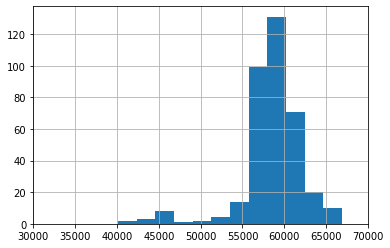

In [8]:
result["cnt_all"].hist(bins=30)
plt.xlim([30000,70000])